We have a dataset containing all the information for videogame sales from the first years of game releases all the way to 2016. We are looking at all the trends in sales, reviews, and overall performance of games and platforms. By analyzing this data, our goal is to create a strategy for a game release in the year 2017. We can understand what platforms are growing and shrinking, what types of games do well and in what parts of the world, what genres are successful and what genres fail, and whether we should prioritize our release according to what we find in the data. 

In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

In [3]:
import seaborn as sns

In [4]:
from scipy import stats as st

In [5]:
data = pd.read_csv('/datasets/games.csv')

In [6]:
data

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [7]:
data.columns = data.columns.str.lower()

Converted column names to lowercase

In [8]:
data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Datatypes will need to be converted. 

In [10]:
data['year_of_release'] = data['year_of_release'].dropna().astype(int)

In [11]:
data['year_of_release']= pd.to_datetime(data['year_of_release'], format='%Y', errors='coerce')

converted year_of_release column to time date

In [12]:
data['critic_score']= data['critic_score'].astype(float)

In [13]:
data=data.dropna()

Converted critic_score column from object to float and then filled missing data with the median score since there are limited outliers to estimate their value.

In [14]:
data=data[data['user_score'] != 'tbd']

In [15]:
data['user_score']= data['user_score'].astype(float)

In [16]:
data['user_score']= data['user_score'].fillna(data['user_score'].median())

In [17]:
data['user_score'].isna().sum()
data['user_score'].value_counts()

7.8    294
8.0    259
8.2    258
8.5    238
7.9    235
      ... 
1.0      2
0.6      1
0.9      1
1.3      1
0.7      1
Name: user_score, Length: 89, dtype: int64

For the user_score column we replaced any values not TBD to a float and filled the missing values with the median value for the column. With no outliers it seemed to be the more accurate way to fill missing values

In [18]:
data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006-01-01,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
2,Mario Kart Wii,Wii,2008-01-01,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009-01-01,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
6,New Super Mario Bros.,DS,2006-01-01,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006-01-01,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
...,...,...,...,...,...,...,...,...,...,...,...
16663,E.T. The Extra-Terrestrial,GBA,2001-01-01,Action,0.01,0.00,0.00,0.00,46.0,2.4,E
16673,Mortal Kombat: Deadly Alliance,GBA,2002-01-01,Fighting,0.01,0.00,0.00,0.00,81.0,8.8,M
16692,Metal Gear Solid V: Ground Zeroes,PC,2014-01-01,Action,0.00,0.01,0.00,0.00,80.0,7.6,M
16696,Breach,PC,2011-01-01,Shooter,0.01,0.00,0.00,0.00,61.0,5.8,T


In [19]:
for genre in data['genre'].unique():
    if pd.isna(genre):
        continue
    filter_genre = data[(data['genre']==genre) & ~(data['rating'].isna())]
    data.loc[data[(data['genre']==genre)& (data['rating'].isna()) ].index,'rating'] = filter_genre['rating'].mode()[0]

Here is where I filled the missing genre values with the mode for the column

In [20]:
data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006-01-01,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
2,Mario Kart Wii,Wii,2008-01-01,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009-01-01,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
6,New Super Mario Bros.,DS,2006-01-01,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006-01-01,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
...,...,...,...,...,...,...,...,...,...,...,...
16663,E.T. The Extra-Terrestrial,GBA,2001-01-01,Action,0.01,0.00,0.00,0.00,46.0,2.4,E
16673,Mortal Kombat: Deadly Alliance,GBA,2002-01-01,Fighting,0.01,0.00,0.00,0.00,81.0,8.8,M
16692,Metal Gear Solid V: Ground Zeroes,PC,2014-01-01,Action,0.00,0.01,0.00,0.00,80.0,7.6,M
16696,Breach,PC,2011-01-01,Shooter,0.01,0.00,0.00,0.00,61.0,5.8,T


In [21]:
data.isnull().sum()

name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
dtype: int64

In [22]:
data.duplicated().sum()

0

In [23]:
data['total_sales']= data['na_sales'] + data['eu_sales'] + data['jp_sales']+ data['other_sales']

Total sales calculated by creating a new column with the sum of na_sales, eu_sales, jp_sales, and other sales to give us the global sales for each game.

In [24]:
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006-01-01,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
2,Mario Kart Wii,Wii,2008-01-01,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009-01-01,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
6,New Super Mario Bros.,DS,2006-01-01,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006-01-01,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91


In [25]:
data['release_year']= pd.to_datetime(data['year_of_release']).dt.year

In [26]:
games_per_year = data.groupby('release_year').size()

In [27]:
games_per_year

release_year
1985      1
1988      1
1992      1
1994      1
1996      7
1997     13
1998     25
1999     30
2000    102
2001    256
2002    455
2003    498
2004    476
2005    562
2006    528
2007    590
2008    592
2009    550
2010    429
2011    454
2012    313
2013    266
2014    253
2015    211
2016    212
dtype: int64

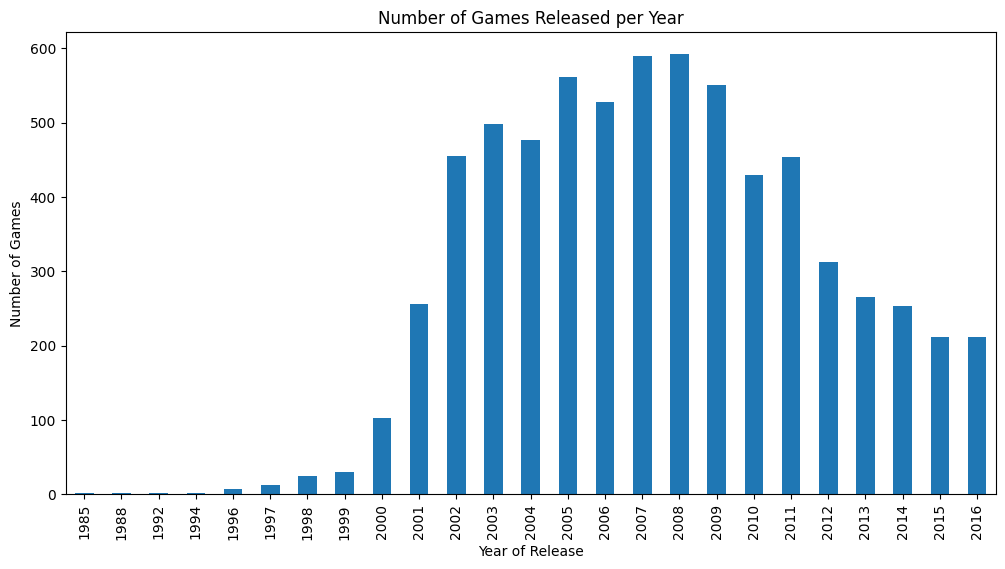

In [28]:
games_per_year.plot(kind='bar', figsize=(12,6))
plt.xlabel('Year of Release')
plt.ylabel('Number of Games')
plt.title('Number of Games Released per Year')
plt.show()

In [29]:
games_sales = data.groupby('year_of_release').agg({'name':'count'})
games_sales = games_sales.rename(columns = {'name': 'Number of games sold'}, level=0)
games_sales.index = games_sales.index.rename('year')
games_sales

,Number of games sold
year,
1985-01-01,1
1988-01-01,1
1992-01-01,1
1994-01-01,1
1996-01-01,7
1997-01-01,13
1998-01-01,25
1999-01-01,30
2000-01-01,102


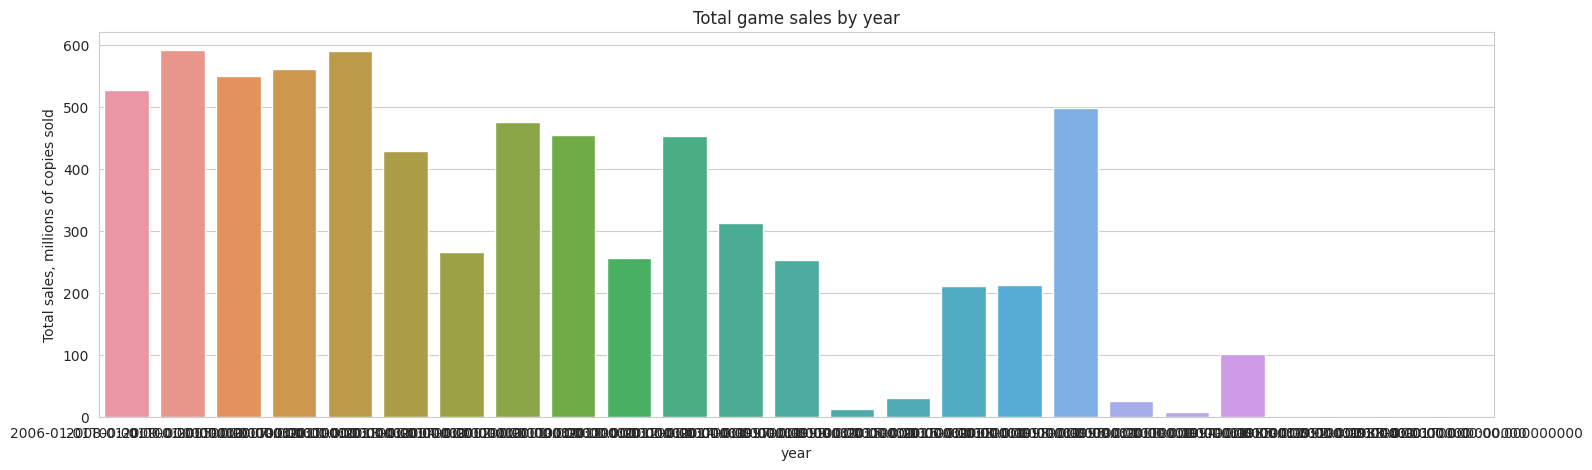

In [30]:
games_sales= data.pivot_table(index='year_of_release', values='name', aggfunc='count').reset_index()

sns.set_style('whitegrid')
plt.figure(figsize=(18,5))
sns.countplot(data= data, x='year_of_release')
plt.title('Total game sales by year')
plt.ylabel('Total sales, millions of copies sold')
plt.xlabel('year');

This graph gives us the distribution for total sales for each year in this dataset. We can see that in 2000 sales for games started to significantly increase with the peak for game sales being in 2008. After 2008 we begin to see a decline in sales up to 2016.

In [31]:
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales,release_year
0,Wii Sports,Wii,2006-01-01,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54,2006
2,Mario Kart Wii,Wii,2008-01-01,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52,2008
3,Wii Sports Resort,Wii,2009-01-01,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77,2009
6,New Super Mario Bros.,DS,2006-01-01,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80,2006
7,Wii Play,Wii,2006-01-01,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91,2006


In [32]:
total_sales_by_platform = data.groupby('platform')['total_sales'].sum().reset_index()

In [33]:
total_sales_by_platform.sort_values(by='total_sales', ascending=False)

,platform,total_sales
7,PS2,946.01
14,X360,853.24
8,PS3,784.45
12,Wii,658.97
2,DS,382.22
9,PS4,243.00
15,XB,211.93
6,PS,206.65
10,PSP,187.68
5,PC,186.71


Here we have a dataframe of total sales per console listed from most successful to least successful. The top 3 most successful platforms are PS2, Xbox360, and PS3.

In [34]:
sales_by_platform_year = data.groupby(['platform', 'release_year'])['total_sales'].sum().reset_index()

In [35]:
top_10_platforms= total_sales_by_platform.nlargest(10, 'total_sales')['platform']

In [36]:
top_3_platforms = total_sales_by_platform.nlargest(3, 'total_sales')['platform']

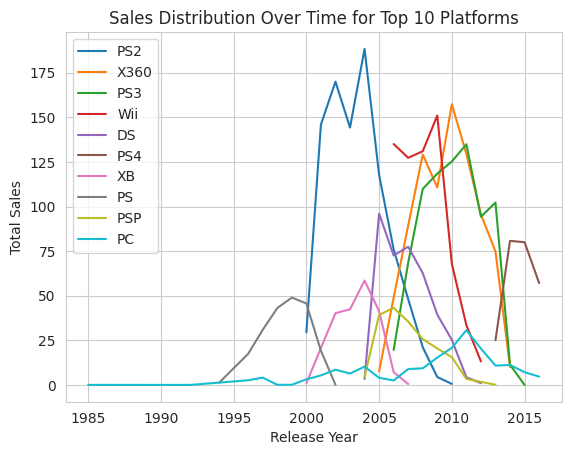

In [37]:
for platform in top_10_platforms:
    platform_data = sales_by_platform_year[sales_by_platform_year['platform'] == platform]
    plt.plot(platform_data['release_year'], platform_data['total_sales'], label=platform)

plt.xlabel('Release Year')
plt.ylabel('Total Sales')
plt.title('Sales Distribution Over Time for Top 10 Platforms')
plt.legend()
plt.show()

This graph gives us an idea of the top 10 most successful platforms by global game sales across the life of our data set. We see that most platforms have a sharp spike in sales within the first 2 years on the market followed by a sharp decline after 1-3 years of peak sales. In our data, most platforms on our list have reached zero sales indicating that they may no longer be considered on the market. PS4 appears to be the only game platform still selling games in our dataset.

In [38]:
top_3_platforms

7      PS2
14    X360
8      PS3
Name: platform, dtype: object

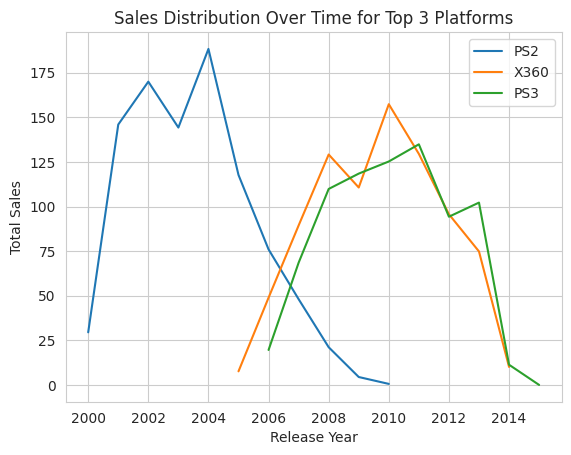

In [39]:
for platform in top_3_platforms:
    platform_data = sales_by_platform_year[sales_by_platform_year['platform'] == platform]
    plt.plot(platform_data['release_year'], platform_data['total_sales'], label=platform)

plt.xlabel('Release Year')
plt.ylabel('Total Sales')
plt.title('Sales Distribution Over Time for Top 3 Platforms')
plt.legend()
plt.show()

This graph represents the distribution for the 3 most successful platforms by global sales. PS2, XBOX360, and PS3 have the most sales of all the platforms in our dataset over the lifetime of the platforms. We see that each platform peaks in popularity in the first 2-3 years that it's in with sales for each lasting between 10-11 years beofre it stops selling games. Each platforms appears to have stopped selling games by 2016.

In [40]:
data_filtered = data[(data['release_year'] >= 2013) & (data['release_year'] <= 2016)]

Text(0.5, 1.0, 'Total Sales by Platform between 2013 and 2016')

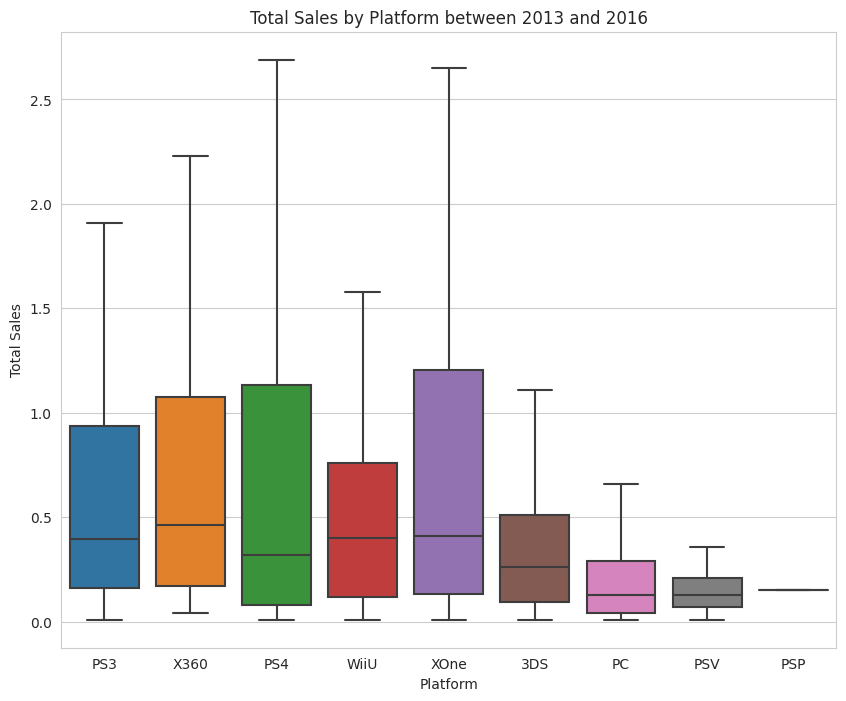

In [41]:
plt.figure(figsize=(10,8))
platform_sales_box= sns.boxplot(x='platform', y='total_sales', data=data_filtered, showfliers=False)
plt.ylabel('Total Sales')
plt.xlabel('Platform')
platform_sales_box.set_title('Total Sales by Platform between 2013 and 2016')

This box plot gives us the global sales of all games across platforms between 2010 and 2016. The differences in sales are significant as the xbox360, ps3, ps4, Wii, and xboxOne have the greatest distribution and overall the highest average sales.

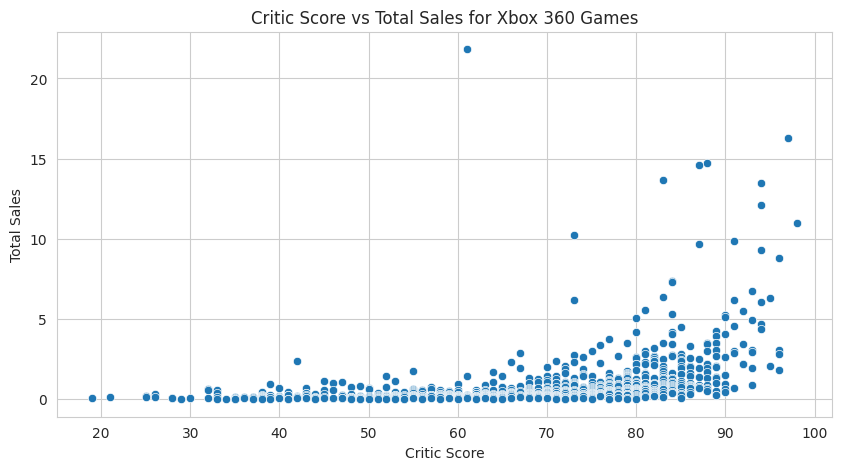

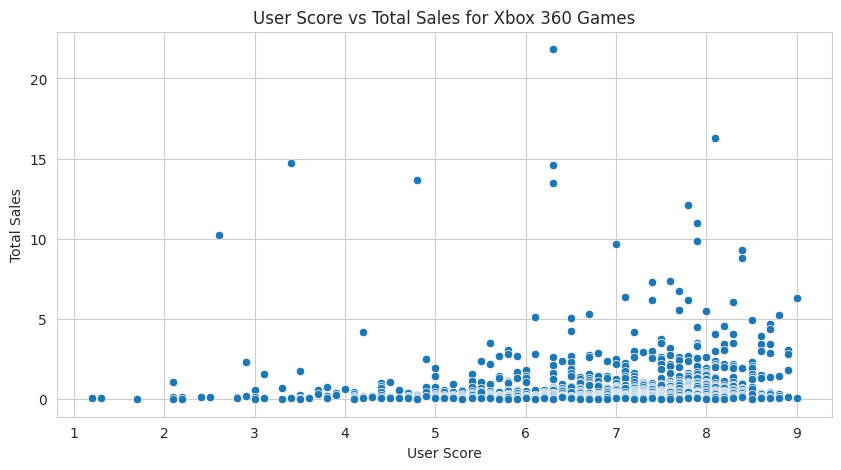

Correlation between Critic Score and Total Sales: 0.3906648313657577
Correlation between User Score and Total Sales: 0.11221112781051665


In [42]:
xbox360_df = data[data['platform'] == 'X360']


plt.figure(figsize=(10, 5))
sns.scatterplot(data=xbox360_df, x='critic_score', y='total_sales')
plt.title('Critic Score vs Total Sales for Xbox 360 Games')
plt.xlabel('Critic Score')
plt.ylabel('Total Sales')
plt.show()


plt.figure(figsize=(10, 5))
sns.scatterplot(data=xbox360_df, x='user_score', y='total_sales')
plt.title('User Score vs Total Sales for Xbox 360 Games')
plt.xlabel('User Score')
plt.ylabel('Total Sales')
plt.show()


critic_correlation = xbox360_df[['critic_score', 'total_sales']].corr().iloc[0, 1]
user_correlation = xbox360_df[['user_score', 'total_sales']].corr().iloc[0, 1]

print(f"Correlation between Critic Score and Total Sales: {critic_correlation}")
print(f"Correlation between User Score and Total Sales: {user_correlation}")


For the Xbox360 there is a correlation between positive critic reviews and total sales. The critic reviews seem to have a moderate impact on the overall sales of a game with a 0.36 correlation value. However, positive user reviews seem to be minimumly correlated with higher sales of a game with a correlation value of 0.07 which means that a higher overall user review for a game does not meaningfully impact the success of a game.

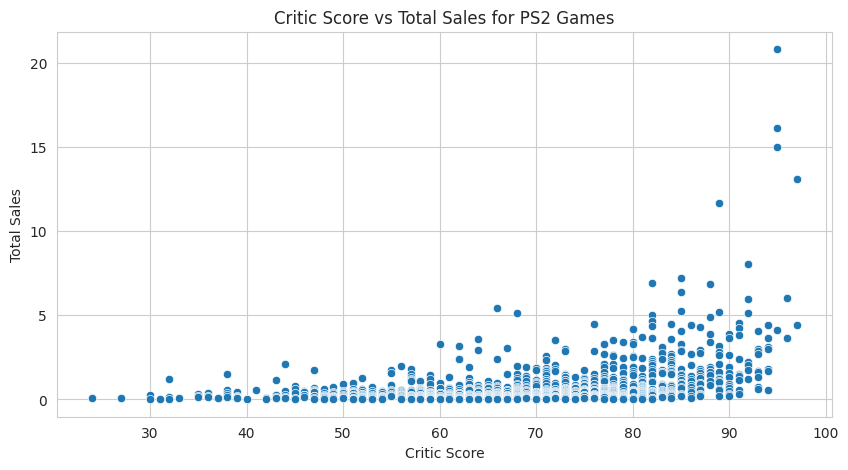

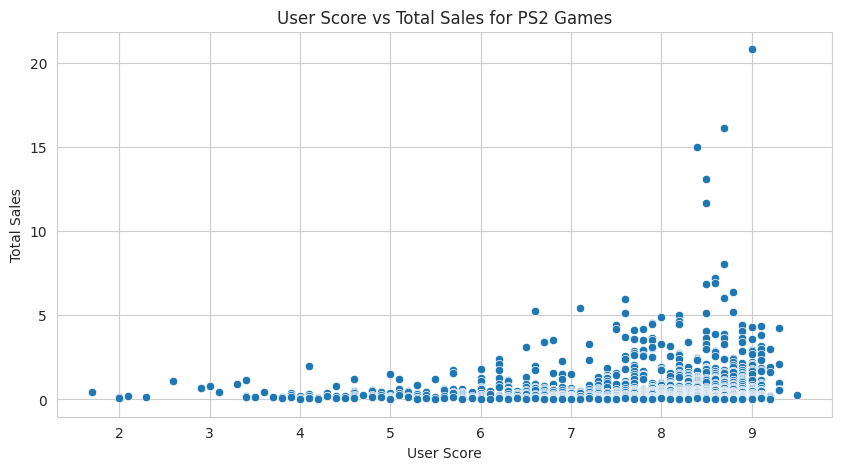

Correlation between Critic Score and Total Sales: 0.3864151028405984
Correlation between User Score and Total Sales: 0.17168986651472287


In [43]:
xbox360_df = data[data['platform'] == 'PS2']


plt.figure(figsize=(10, 5))
sns.scatterplot(data=xbox360_df, x='critic_score', y='total_sales')
plt.title('Critic Score vs Total Sales for PS2 Games')
plt.xlabel('Critic Score')
plt.ylabel('Total Sales')
plt.show()


plt.figure(figsize=(10, 5))
sns.scatterplot(data=xbox360_df, x='user_score', y='total_sales')
plt.title('User Score vs Total Sales for PS2 Games')
plt.xlabel('User Score')
plt.ylabel('Total Sales')
plt.show()


critic_correlation = xbox360_df[['critic_score', 'total_sales']].corr().iloc[0, 1]
user_correlation = xbox360_df[['user_score', 'total_sales']].corr().iloc[0, 1]

print(f"Correlation between Critic Score and Total Sales: {critic_correlation}")
print(f"Correlation between User Score and Total Sales: {user_correlation}")

The trend of critics' scores having a moderate impact on global sales appears to be true for the PS2 as well. The PS2 user reviews have a stronger correlation than the Xbox360 user reviews on overall sales however, user reviews still are considered negligable on the success of a game sales

In [44]:
genre_sales = data.groupby('genre')['total_sales'].sum().reset_index()

In [45]:
genre_sales = genre_sales.sort_values(by='total_sales', ascending=False)

Text(0, 0.5, 'Genre')

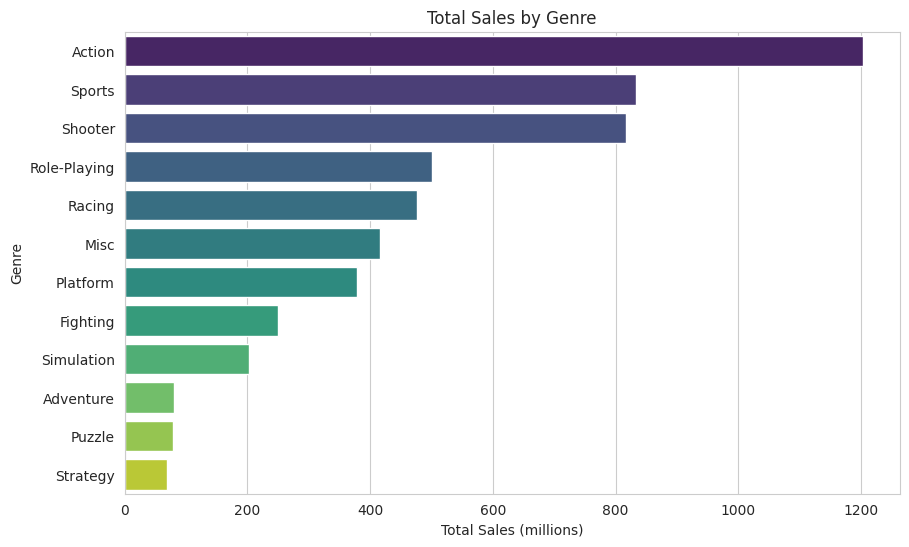

In [46]:
plt.figure(figsize=(10,6))
sns.barplot(x='total_sales', y='genre', data=genre_sales, palette='viridis')
plt.title('Total Sales by Genre')
plt.xlabel('Total Sales (millions)')
plt.ylabel('Genre')

Text(0.5, 0, 'Platform')

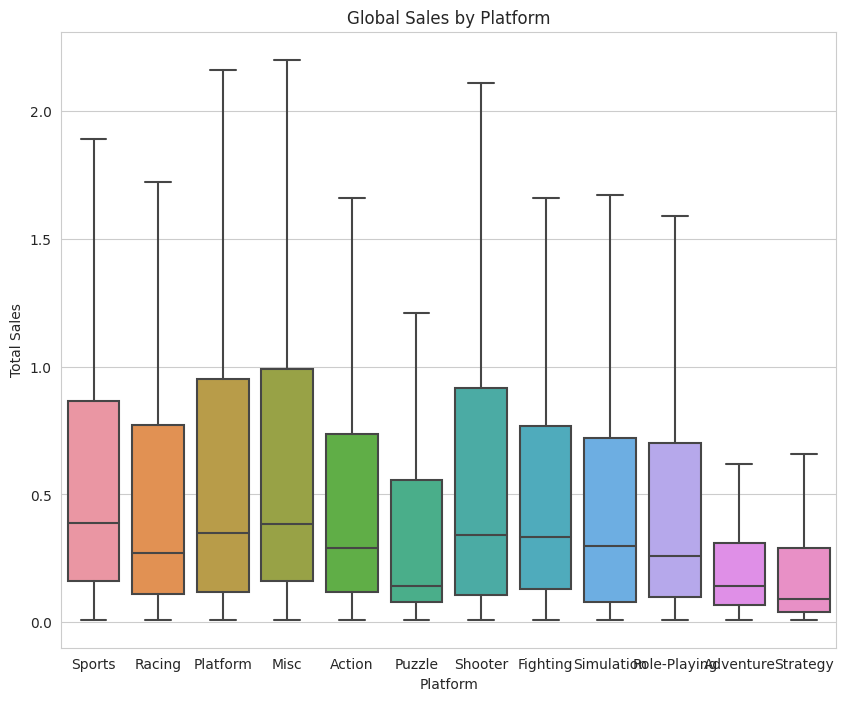

In [47]:
plt.figure(figsize=(10,8))
plt.title('Global Sales by Platform')
sns.boxplot(x='genre', y='total_sales', data=data, showfliers=False)
plt.ylabel('Total Sales')
plt.xlabel('Platform')

Add boxplot here:

This distribution represents total sales of games by genre. We can conclude that Action games are the most successful games in this data set with a significantly higher volume of sales (~1650) than the next most popular genre, sports (~1300). The least popular genres are Puzzle, Adventure, and Strategy whose combined sales are less than half of the sales of Adventure games. With the sales presented as a box chart we can see some interesting data over the distributions, specifically we see that plaform and shooter genres have a higher average sales.

In [48]:
na_sales_platform = data.groupby('platform')['na_sales'].sum().reset_index()

In [49]:
na_sales_platform = na_sales_platform.sort_values(by='na_sales', ascending=False)

In [50]:
na_sales_platform.head(5)

,platform,na_sales
14,X360,533.43
7,PS2,472.65
12,Wii,342.91
8,PS3,341.62
2,DS,173.40


Text(0.5, 1.0, 'North American Sales by Platform')

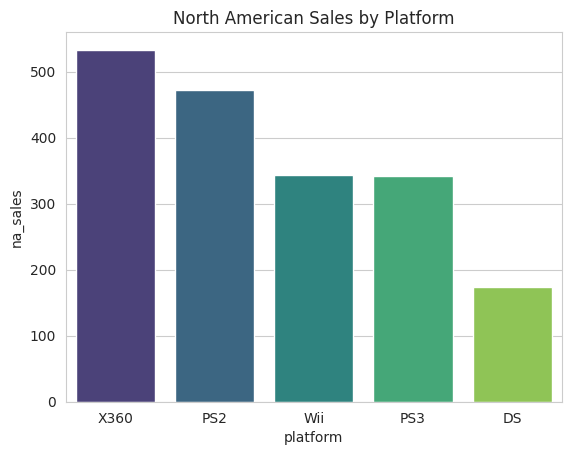

In [51]:
na_bar_platform= sns.barplot(x='platform', y='na_sales', data=na_sales_platform.head(), palette='viridis')
na_bar_platform.set_title('North American Sales by Platform')

In [52]:
na_sales_genre = data.groupby('genre')['na_sales'].sum().reset_index()

In [53]:
na_sales_genre = na_sales_genre.sort_values(by='na_sales', ascending=False)

In [54]:
na_sales_genre.head(5)

,genre,na_sales
0,Action,591.23
10,Sports,457.52
8,Shooter,448.76
6,Racing,225.59
3,Misc,222.05


Text(0.5, 1.0, 'North American Sales by Genre')

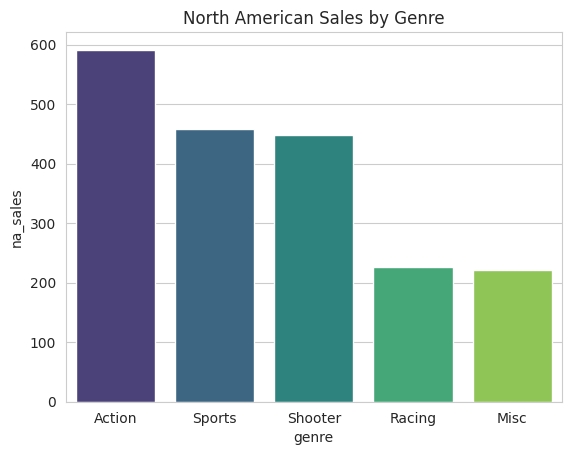

In [55]:
na_bar_genre = sns.barplot(x='genre', y='na_sales', data=na_sales_genre.head(), palette='viridis')
na_bar_genre.set_title('North American Sales by Genre')

In [56]:
na_sales_rating= data.groupby('rating')['na_sales'].sum().reset_index()

In [57]:
na_sales_rating= na_sales_rating.sort_values(by='na_sales', ascending=False)

In [58]:
na_sales_rating

,rating,na_sales
1,E,986.02
4,M,724.61
6,T,694.23
2,E10+,286.03
0,AO,1.26
3,K-A,0.26
5,RP,0.00


Text(0.5, 1.0, 'North American Sales by Rating')

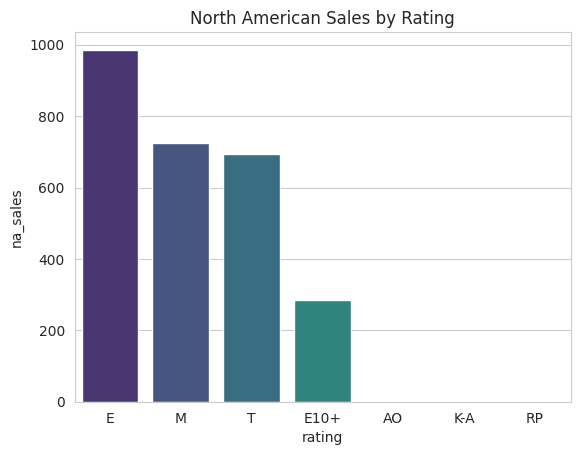

In [59]:
na_bar_rating = sns.barplot(x='rating', y='na_sales', data=na_sales_rating, palette='viridis')
na_bar_rating.set_title('North American Sales by Rating')

For North America, we can notice some trends in the data. For this region we can view the top performing platforms, genres, and game ESRB ratings to see what combinations do well in North American markets.

In [60]:
eu_sales_platform = data.groupby('platform')['eu_sales'].sum().reset_index()

In [61]:
eu_sales_platform = eu_sales_platform.sort_values(by='eu_sales', ascending=False)

In [62]:
eu_sales_platform.head(5)

,platform,eu_sales
8,PS3,273.50
7,PS2,255.14
14,X360,234.33
12,Wii,204.13
9,PS4,111.78


Text(0.5, 1.0, 'EU Sales by Platform')

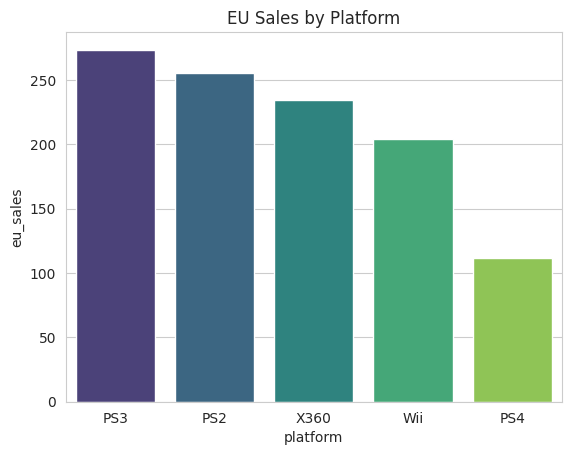

In [63]:
eu_bar_platform= sns.barplot(x='platform', y='eu_sales', data=eu_sales_platform.head(), palette='viridis')
eu_bar_platform.set_title('EU Sales by Platform')

In [64]:
eu_sales_genre = data.groupby('genre')['eu_sales'].sum().reset_index()

In [65]:
eu_sales_genre = eu_sales_genre.sort_values(by='eu_sales', ascending=False)

In [66]:
eu_sales_genre.head(5)

,genre,eu_sales
0,Action,387.78
8,Shooter,261.12
10,Sports,247.43
6,Racing,164.66
3,Misc,120.46


Text(0.5, 1.0, 'EU Sales by Genre')

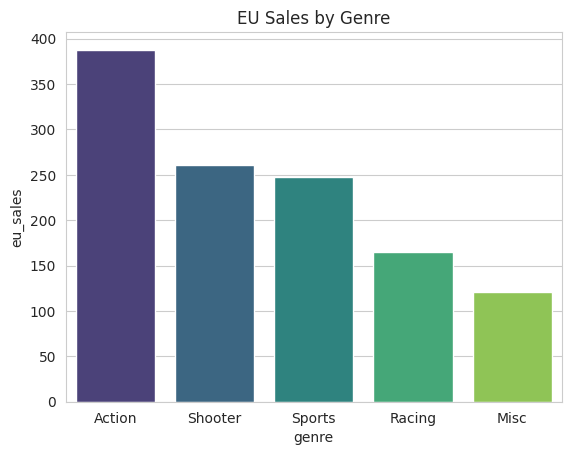

In [67]:
eu_bar_genre= sns.barplot(x='genre', y='eu_sales', data=eu_sales_genre.head(), palette='viridis')
eu_bar_genre.set_title('EU Sales by Genre')

In [68]:
eu_sales_rating= data.groupby('rating')['eu_sales'].sum().reset_index()

In [69]:
eu_sales_rating = eu_sales_rating.sort_values(by='eu_sales', ascending=False)

In [70]:
eu_sales_rating

,rating,eu_sales
1,E,590.78
4,M,467.07
6,T,396.82
2,E10+,155.94
0,AO,0.61
3,K-A,0.16
5,RP,0.03


Text(0.5, 1.0, 'EU Sales by Rating')

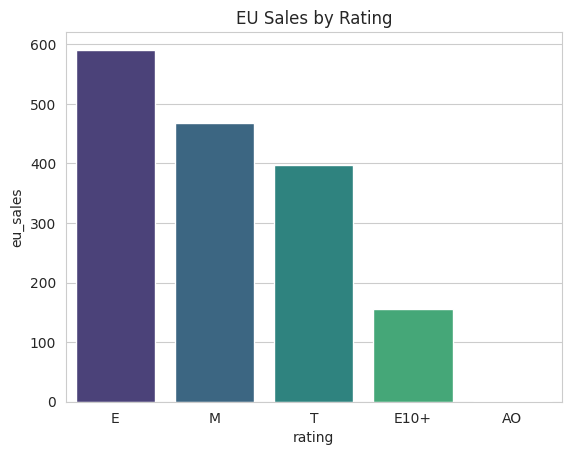

In [71]:
eu_bar_rating = sns.barplot(x='rating', y='eu_sales', data=eu_sales_rating.head(), palette='viridis')
eu_bar_rating.set_title('EU Sales by Rating')

For Europe, we can notice some trends in the data. For this region we can view the top performing platforms, genres, and game ESRB ratings to see what combinations do well in European markets.

In [72]:
japan_sales_platform = data.groupby('platform')['jp_sales'].sum().reset_index()

In [73]:
japan_sales_platform = japan_sales_platform.sort_values(by='jp_sales', ascending=False)

In [74]:
japan_sales_platform.head(5)

,platform,jp_sales
2,DS,83.66
7,PS2,75.81
8,PS3,54.52
12,Wii,52.37
6,PS,38.85


Text(0.5, 1.0, 'Japanese Sales by Platform')

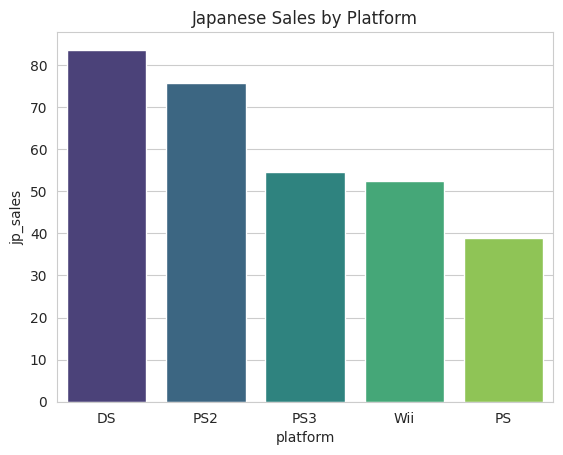

In [75]:
jp_sales_platform=sns.barplot(x='platform', y='jp_sales', data=japan_sales_platform.head(), palette='viridis')
jp_sales_platform.set_title('Japanese Sales by Platform')

In [76]:
jp_sales_genre = data.groupby('genre')['jp_sales'].sum().reset_index()

In [77]:
jp_sales_genre = jp_sales_genre.sort_values(by='jp_sales', ascending=False)

In [78]:
jp_sales_genre.head(5)

,genre,jp_sales
7,Role-Playing,122.47
0,Action,76.17
4,Platform,43.09
10,Sports,34.54
3,Misc,33.22


Text(0.5, 1.0, 'Japanese Sales by Genre')

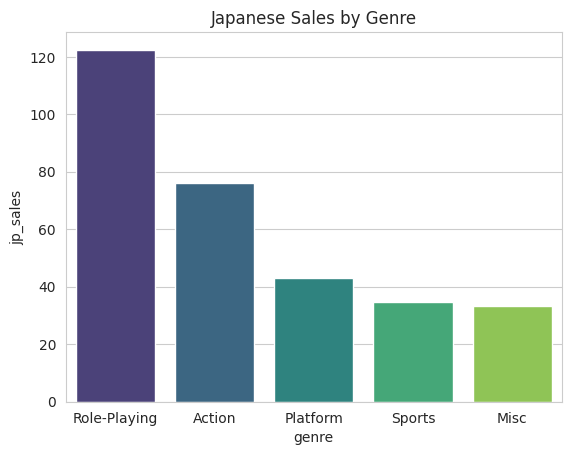

In [79]:
jp_bar_genre = sns.barplot(x='genre', y='jp_sales', data=jp_sales_genre.head(), palette='viridis')
jp_bar_genre.set_title('Japanese Sales by Genre')

In [80]:
jp_sales_rating= data.groupby('rating')['jp_sales'].sum().reset_index()

In [81]:
jp_sales_rating= jp_sales_rating.sort_values(by='jp_sales', ascending=False)

In [82]:
jp_sales_rating

,rating,jp_sales
1,E,190.67
6,T,144.66
4,M,62.28
2,E10+,38.81
3,K-A,1.46
0,AO,0.00
5,RP,0.00


Text(0.5, 1.0, 'Japanese Sales by Rating')

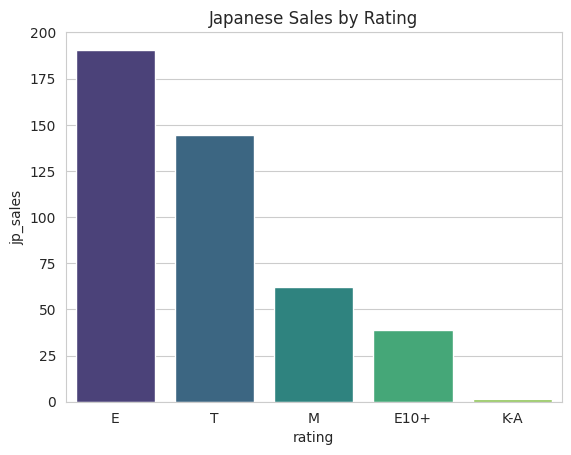

In [83]:
jp_bar_rating=sns.barplot(x='rating', y='jp_sales', data=jp_sales_rating.head(), palette='viridis')
jp_bar_rating.set_title('Japanese Sales by Rating')

For Japan, we can notice some trends in the data. For this region we can view the top performing platforms, genres, and game ESRB ratings to see what combinations do well in Japanese markets.

Null Hypothesis: average user ratings of the Xbox One and PC platforms are the same
Alternative: average user ratings of the Xbox One and PC platforms are not the same

In [84]:
xbox_one_df = data[(data['platform']== 'XOne')]
pc_df = data[(data['platform']== 'PC')]

xbox_scores=xbox_one_df['user_score']
pc_scores = pc_df['user_score']

alpha = 0.05

results = st.ttest_ind(xbox_scores, pc_scores, equal_var=False)

print(results.pvalue)
if results.pvalue < alpha:
    print('We reject the null hypothesis')
else:
    print('We can\'t reject the null hypothesis')

6.469147981752585e-06
We reject the null hypothesis


We do not accept that the average user ratings for the XboxOne and PC are the same. 

Null Hypothesis: Average user ratings for the Action and Sports genres are different.
Alternative: Average user ratings for the Action and Sports genres are not different.

In [85]:
action_df = data[(data['genre'] == 'Action') & data['user_score'].notnull()].copy()
sports_df = data[(data['genre'] == 'Sports') & data['user_score'].notnull()].copy()

action_scores=action_df['user_score']
sports_scores=sports_df['user_score']

alpha = 0.05

results = st.ttest_ind(action_scores, sports_scores)

print('p-value:', results.pvalue)

if results.pvalue < alpha:
    print('We reject the null hypothesis')
else:
    print('We can\'t reject the null hypothesis')

p-value: 0.7959786214567501
We can't reject the null hypothesis


We cannot reject that the average user ratings between Action and Sports genres are the different

This games sales dataset provides some insights into the average gamer lifestyle and gaming choices of the 3 major markets: North America, European, and Japanese. Althought there were major missing values for most of the ratings and user/critic scores, with dropping those records, the data could still be used to gather useful information such as:

1. Identifying there are no obvious correlations between user/critic ratings and total sales/market shares 
2. Able to identify lifecycle patterns for game systems and use it to predict sales trends to build a 2017 sales model for PS4 and Xbox One systemss
3. Playstation is the leading manufacturer in sales w/ having 3 of the 6 platforms with the highest average sales over the time period
4. Was able to build user profiles for the main 3 geographical regions in the dataset: North America, Europe, and Japan
5. Finally, was able to build 4 independent samples to test two hypotheses and provide analysis on the results 